In [ ]:
#model select -> crossvalidation 을 통해 모델 검증해주자
#feature select ->  변수, 특성 선택 -> 변수제거하는 방법으로 RFE  를 했다!! 
#feature extraction -> 이미지 특징 추출, 텍스트 특징 추출   (manifold 의 대표적인 것 : MDS )

In [ ]:
# preprocessing -> learning- > model -> predict service   ( learning 하면서도 predict 는 계속 이루어진다 ) 

###learning  : ex ) boston 집값은 500x30 으로 데이터가 들어왔다. 
#           여기에 30x1 가중치(=변환기=transform=특징추출)를 곱하면 결과가 500x1 이 된다 
#          500x300 일때 500x1 로 줄이면 손실되는 정보가 많다--> multi rayer 로 보안한다!! (= 500x300 에 300x100 을 하고 그다음 100x1 을 곱한다 ) 

# 차원확대를 할때도 있다 -> SVC 는 차원확대를 좋아한다 (차원확대할때 중요한 것 : kunnel ) 


### 활성화함수 ( 매핑시키는 역할 , identity와 sigmoid, softmax 를 이용해서 매핑시킨다 , sigmoid 는 0~1사이로 매핑시킨다 즉 확률값으로 매핑하는것이므로 분류가 된다 identity 는 가중치를 곱해서 나온값 그대로 내보내므로  회귀가 된다 , softmax 는 클래스가 여러개일때 쓴다 )  를 통과한다 
### activation function=활성화함수=분류나 회귀(예측) 인지 결정한다 -> scikits 에서는MLP Regression , MLP classifier 함수가 존재한다. (이미무엇인지 결정되어있다) -> tensorflow 에서는 직접 정해야함 

# learning rate : 학습률 (우리가 직접하는 것이 아니다 . solver 가 해준다 ) 
####learning rate 와 가중치를 계산하는 방법에 따라 solver 여러가지있다 ->  sgd (stock cast gradian descent ,배치학습아니고 일부분씩 잘라서 조금씩 조절하게 되면 지역해로 넘어갈수도 있고 속도가 빨라진다 ) , adam ( learningrate 와 가중치를 조절할 수 있다 , 지역해를 넘어서기 위해서 가던방향으로 계속 가보자. momentum 의 개념?? )
####---> 우리는 어떤 solver 를 선택할것인지, learning rate 를 얼마로 줄지만 결정하면 된다


#과정이름  순전파(yhat 을 만드는것, 순서대로 진행된다고 보기 ) / 역전파(가중치를 조절하는것) 개념

In [ ]:
# 4차 산업혁명 : IOT , BigData, AI, AR/VR/MR , (금융으로 넘어간것)fintech -> (보안으로 넘어가서) blockchain , 
#               AI + IOT = AIOT ( 신경망 )  

In [ ]:
# 신경망을 잘 만들수 있는 것 : tensorflow  (망과 망을 연결해서 우리 마음대로 모델을 만들 수 있다 ) 

In [ ]:
# 오늘 배우는 것 : ANN ( FFNN : feed forward neural network 라고도 한다 )  -> scikits 에서 모델을 만든 것이 MLD ( multi-layer perceptron )  

In [ ]:
# multi layer 을 달다보니까 기울기가 소멸된다   ---> LSTM  : 소멸되는 기울기를 기억해서 방지해준다 

# MLD 도 지도학습, 비지도학습있다 . 

# 신경망 : 전처리 특히 정규화를 해주지 않으면 잘 작동하지 않고 발산하게 된다 ( 신경망의 경우 전처리에서 정규화는 필수!! ) 

In [5]:
%matplotlib inline 
#위는 쥬피터 에서 쓰는 것
import matplotlib.pyplot as plt # 시각화 할때 쓰는 패키지
import mglearn  # 학습 도움을 위해서 만든 패키지
from sklearn.neural_network import MLPClassifier # neural_network 안에 MLP classifier 가 있다!! MLP Regressor 도 있다 

# MLP : multi layer perceptron : FFNN (Feed forward neural network)
# forward propagation : 순전파 (순전파과정은 예측분류 과정이다, 가중치random 하게 초기화되어있어서 모르니까 학습을 해준다. 역전파를 통해 학습을 한다 ) 
# backward propagation : 역전파 (가중치를 학습하는 과정이다--> cost function 의 기울기와 learning rate 를 이용해서 학습한다 ) 
### 역전파하는 과정을 담당하는 것이 solver !!! (estimator, transformer 의 solver ?! 무슨말인지 모르곘다  )
#### solver = 미분하고 learning rate 를 조절하는 역할을 하는 것이다, 그리고 가중치를 조절하는 역핟로 한다 

# 랜덤하게 사이즈를 채운 후 , 행렬제곱을 하면 정방행렬이면서 대칭행렬인 행렬이 만들어진다 
# 그리고 만들어진 행렬에 고유값분해를 하면 고유치와 고유벡터가 얻어진다 ( 정직교하는 벡터가 만들어지는데 이걸 MDS 행렬에 곱해서 특징을 추출) 
# 어제 배운 MDS 행렬곱 ( 직교하는 2,3차원을 곱해주면 변환이 된다 )--> 그래서 MDS 는 2차원이나 3차원의 특징을 추출하는데 도움을 준다  

from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
X, y = make_moons(n_samples=100, noise=0.25, random_state=3)  # make_moons -> 반달모양으로 데이터를 만든다 (교육용으로 데이터 만듬x,y 만들어짐)

C:\Users\ICT01_09\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Text(0, 0.5, '특성1')

C:\Users\ICT01_09\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 53945 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\ICT01_09\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 49457 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\ICT01_09\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 53945 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\ICT01_09\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 49457 missing from current font.
  font.set_text(s, 0, flags=flags)


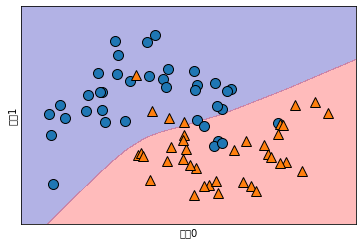

In [9]:
# stratify : 층화변수선택법 ( 무작위로 뽑는것이 아니라 y 값의 비율을 0.75, 0.25 로 나눠서 하는 것 )

X_train, X_test, y_train, y_test = train_test_split(X,y, stratify=y, random_state = 42)

# multi layer 을 쓰는 이유 :  문제를 해결한다, 레이어가 많으면 정밀도가 자동으로 높아진다 
mlp = MLPClassifier(random_state=0).fit(X_train, y_train)   # 피팅한 데이터에 적합하게 가중치가 완성이 된다 
# 우리가 레이어에 대해 지정한 것은 없다 -> 이럴땐 자동으로 MLPClassifier 가 가중치 레이어 사이즈를 결정한다 (tensorflow 가면 우리가 줘야한다) 

mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3) # 점들을 다 넣어보라는 것 , fill=true는 색을 채우라는것
mglearn.discrete_scatter(X_train[:,0],X_train[:,1], y_train)       
plt.xlabel("특성0")
plt.ylabel("특성1")

In [10]:
mlp.get_params()  # 매개변수값이 출력된다 .우리가 mlp 만들때 random_state 만 지정해줬다. 나머지는 전부 디폴트 매개변수이다
#relu : 0이하를 제거한 활성화 함수이다 ( 이 activation function 을 쓰면 속도가 빨라진다 ) 
# learning_rate 도 출력이 된다 (constant 로 변하지 않는다는 뜻이다)
# learning_rate_init : 0.001 로 초기화되어있다
# max_iter : 반복회수 ( 1회 반복하는 것을 epoch 라고 한다 ) 

# solver 로 adam 이 쓰이고 있다  (adam 은 learning-rate 를 조절하고, Momentum 을 사용하는 optimizer(=최적화기) 이다 . solver 라고 할수도 있고, optimizer 라고 할 수도 있다 ) 


{'activation': 'relu',
 'alpha': 0.0001,
 'batch_size': 'auto',
 'beta_1': 0.9,
 'beta_2': 0.999,
 'early_stopping': False,
 'epsilon': 1e-08,
 'hidden_layer_sizes': (100,),
 'learning_rate': 'constant',
 'learning_rate_init': 0.001,
 'max_iter': 200,
 'momentum': 0.9,
 'n_iter_no_change': 10,
 'nesterovs_momentum': True,
 'power_t': 0.5,
 'random_state': 0,
 'shuffle': True,
 'solver': 'adam',
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': False,
 'warm_start': False}

In [13]:
mlp.n_layers_  

3

In [19]:
mlp.coefs_ # coefficient
# bias : 계수들이 0으로 가는 것을 방지해서 처음에 1로 세팅을 한다

[array([[ 1.96423650e-01,  1.86414048e-01,  2.73074871e-02,
          1.32154297e-01, -9.48047217e-05,  2.82807555e-03,
         -7.29479240e-02,  1.45878653e-01,  2.97837159e-01,
         -1.12611776e-01,  2.34714552e-01,  1.30702586e-01,
         -2.85623212e-02,  1.12399918e-01, -1.71442282e-01,
         -3.24829063e-01, -3.85153290e-01,  2.38832765e-01,
          2.13193712e-01,  2.63746115e-01,  1.70653255e-01,
          7.41106685e-02,  1.04573476e-01,  6.73150355e-02,
         -3.77696555e-01,  1.10071889e-01,  4.88102808e-03,
          3.03409150e-01, -6.64267214e-02, -1.08723630e-01,
         -2.67443736e-01,  2.19702964e-01, -9.77933350e-02,
          3.95350833e-05, -1.67873856e-01,  1.32818304e-01,
          2.23922646e-02, -1.13671191e-02,  2.94106612e-01,
          3.48486041e-02, -1.28573692e-01, -1.62111791e-05,
          1.34093216e-01, -3.48957410e-01,  1.73951614e-01,
          2.50280090e-02, -3.77490782e-01, -3.22208104e-01,
         -8.09493846e-02, -4.14861544e-0

In [20]:
mlp.classes_

array([0, 1], dtype=int64)

In [22]:
mlp.n_outputs_

1

Text(0, 0.5, '특성1')

C:\Users\ICT01_09\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 53945 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\ICT01_09\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 49457 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\ICT01_09\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 53945 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\ICT01_09\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 49457 missing from current font.
  font.set_text(s, 0, flags=flags)


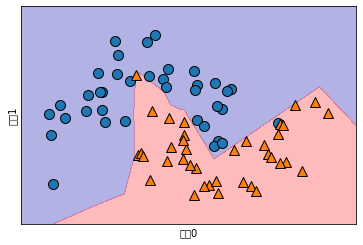

In [31]:
# solver 를 바꿨을떄? 
mlp = MLPClassifier(solver= 'lbfgs', random_state= 0, hidden_layer_sizes=[10,10])

  # 히든레이어 사이즈 지정시 무엇을 지정하는가? 10x10의 앞자리 10 처럼 출력차수만 지정해주면 된다(=추출할 특징수) -> 밑에보면 2x10 이 만들어지고, 10x10 이 만들어진다  
  # 그리고 레이어가 10개 이상주면 기울기소실문제가 발생한다  

mlp.fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3) # 점들을 다 넣어보라는 것 , fill=true는 색을 채우라는것
mglearn.discrete_scatter(X_train[:,0],X_train[:,1], y_train)       
plt.xlabel("특성0")
plt.ylabel("특성1")

# solver 가 바뀌고 아래 그림을 보면 과적합되고 있는 것을 확인해볼수있다

In [32]:
mlp.coefs_
#2 x 10 으로 나온다  (  bias=10)   
# 아까는 1개였는데 지금은 layer 가 2개! (첫번쨰 array 를 봤을때 2x10 이다, ) 


# 처음에 x, y 좌표로 했으니까 2 , hidden_layer_sizes=[10,10] 으로 했었음  

#변수는 2x10  , 10x10  ->  10으로 나감 



[array([[-0.15855127,  1.65408267, -0.74007897, -3.95416422, -0.1076738 ,
          7.37539571, -0.08802416,  9.81913382,  7.99356564,  0.25296731],
        [-1.40130717,  1.17896331,  4.7764105 , -1.35478871, -0.60499122,
         -3.93952976, -0.67666214,  0.47959084,  0.40007515, -0.46719005]]),
 array([[-2.57212608e-01,  2.54649014e-01, -1.14412726e+00,
          1.00730872e+00, -5.41076910e-01, -5.93907060e-01,
          3.78895783e-01,  7.68311646e-02, -2.08326606e+00,
          4.07711948e+00],
        [-1.53481421e-01, -6.77908766e-02, -4.28876578e-01,
         -1.27504242e-01,  1.82185280e-01,  4.66638824e-01,
         -1.69792897e+00, -4.13108923e-01, -6.64731654e-01,
          3.06872837e+00],
        [ 7.66868751e-02, -6.58955426e-02,  1.70524181e+00,
         -7.43717100e-01, -3.18039302e-01, -5.11723931e-01,
          1.60457073e+00, -2.69518041e-01,  1.28711884e-01,
         -7.33164618e-01],
        [-3.72560686e-01, -4.43794280e-01,  1.33587069e+00,
         -9.6216049

Text(0, 0.5, '특성1')

C:\Users\ICT01_09\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 53945 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\ICT01_09\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 49457 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\ICT01_09\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 53945 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\ICT01_09\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 49457 missing from current font.
  font.set_text(s, 0, flags=flags)


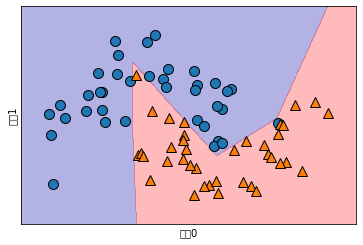

In [33]:
# 5x10 으로 바꾸면?
mlp = MLPClassifier(solver= 'lbfgs', random_state= 0, hidden_layer_sizes=[5,10])


mlp.fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3) 
mglearn.discrete_scatter(X_train[:,0],X_train[:,1], y_train)       
plt.xlabel("특성0")
plt.ylabel("특성1")

In [34]:
mlp.coefs_   # 5,10 으로 바꾸면    ->  2x5  5x10 으로 바뀐다 

[array([[  9.58312525,   8.01326616,   6.38324831, -13.90108441,
          -0.14108705],
        [ -0.15831136,   3.390681  ,   2.98670712,  -1.16530986,
          -0.21540178]]),
 array([[-1.02891626, -2.33889475,  2.12972828,  0.52897872,  2.23957507,
          1.41874928,  0.148644  ,  0.34437075,  7.28226381, -0.48186345],
        [-0.81302935, -0.46973462, -0.01110334, -0.25503688, -0.09567239,
          1.07167377,  2.44161204,  0.06323068,  3.11978885, -0.63798754],
        [-0.40855756, -1.01425374,  1.89146083,  0.85156843,  2.19939312,
          1.2517127 , -2.10707856,  0.65408844,  1.40739894,  0.20930688],
        [-0.68852893,  2.66493476, -1.5262621 ,  0.33742273, -3.40176253,
         -2.50208501, -0.81709543,  3.96204422,  0.37740612, -0.58969023],
        [-0.4275745 ,  0.19328921, -0.31145316, -0.04253044, -0.32264591,
         -0.43052851, -0.49187581,  0.19735584, -0.45677027, -0.38304485]]),
 array([[-0.65227553],
        [-3.54750216],
        [-3.3272718 ],
    

Text(0, 0.5, '특성1')

C:\Users\ICT01_09\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 53945 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\ICT01_09\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 49457 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\ICT01_09\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 53945 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\ICT01_09\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 49457 missing from current font.
  font.set_text(s, 0, flags=flags)


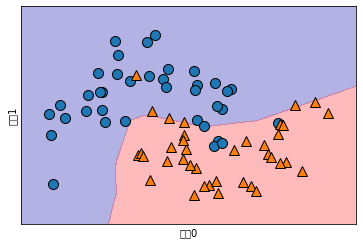

In [35]:
mlp = MLPClassifier(solver= 'lbfgs', random_state= 0, hidden_layer_sizes=[10,5,3,2])  # 레이어4개줄수도 있다 (줄여나가는식으로)  #[10,5,10,2] 줄였다 늘렸다 이걸 이해하는 사람은 완벽히 이해한 것 
#                                   -> 이렇게 4개로 늘리는것 : svm 의 논리와 같다 ( 고차원으로 데이터를 확대시킴) 
 # svm 은 고차원으로 데이터를 확대시키는 것으로 정확도가 높다/ 과적합을 방지해준다.
    # svc (서포트벡터머신으로 만든 classifier ) , svr(서포트 벡터머신으로 만든 regressor)  

mlp.fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3) # 점들을 다 넣어보라는 것 , fill=true는 색을 채우라는것
mglearn.discrete_scatter(X_train[:,0],X_train[:,1], y_train)       
plt.xlabel("특성0")
plt.ylabel("특성1")


In [36]:
mlp.coefs_

[array([[-1.11997758,  0.77870762,  0.10608173, -0.11192047, -0.10795773,
          0.58572127, -0.08825628,  1.18180235,  0.2316036 ,  0.0186587 ],
        [ 0.53029127,  0.29828643,  0.10994826,  0.62429293, -0.60658658,
         -1.17566978, -0.67844649,  0.26155985,  0.4245725 ,  0.90807333]]),
 array([[-0.2177162 ,  0.44969659, -0.0968116 ,  0.08801976, -0.52708719,
          0.21791137, -0.60181465,  0.29272469,  0.80474194,  0.40248417],
        [-0.09087558, -0.05972668,  0.24904654, -0.16609283,  0.1826657 ,
          0.2216314 , -0.72279586, -0.43148883, -0.86844636,  0.00945404],
        [ 0.09362313, -0.06767749,  0.54453226, -0.38297982, -0.31887797,
         -0.36184544,  0.14077892, -0.27101308, -0.15645894, -0.2733035 ],
        [-0.30499631, -0.40444603,  0.32847897, -0.45109323, -0.33234447,
         -0.09391939, -0.17274468, -0.40968932,  0.5566844 , -0.2580962 ],
        [ 0.52188353, -0.03433749,  0.52221391,  0.11484114,  0.26207418,
         -0.50474452, -0.23789

In [ ]:
# 위의 숫자들의 의미를 알 수 없다 -> black box 라고 한다 -> 근데 요즘은 이런 black box 의 의미를 파악해서 원인을 규명하려고 시도중 

In [ ]:
# multi rayer 가 되면 무엇을 해결해주나? XOR 문제를 해결해주었다 정확도가 높아지는 것을 발견할수있다 

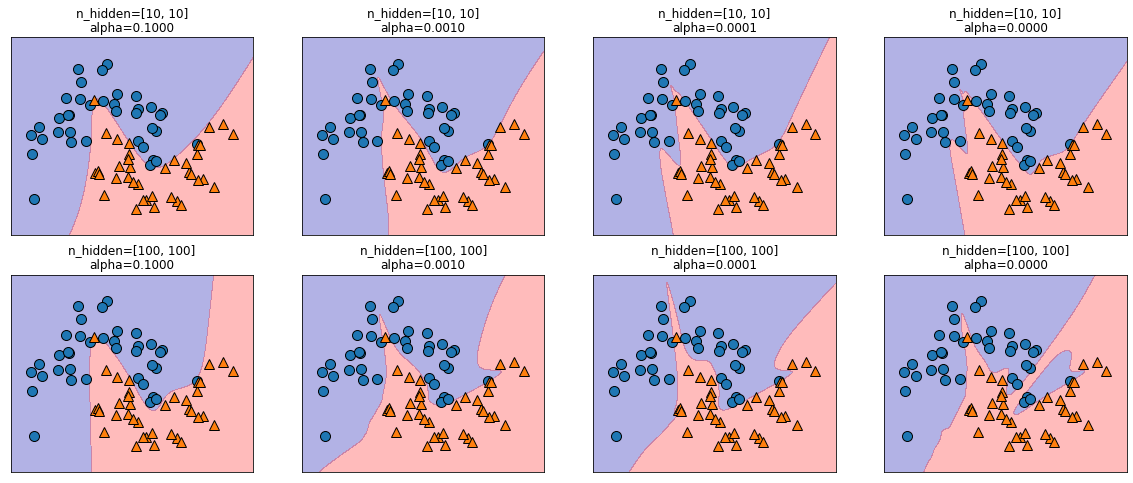

In [37]:
fig, axes = plt.subplots(2,4,figsize=(20,8))
for axx, n_hidden_nodes in zip(axes, [10,100]):    # [10,100]은 hidden size 
    for ax, alpha in zip(axx, [0.1, 0.001, 0.0001, 0.00001]):
        mlp = MLPClassifier(solver='lbfgs', random_state=0, activation='tanh',
                           hidden_layer_sizes=[n_hidden_nodes, n_hidden_nodes], alpha=alpha)
        mlp.fit(X_train, y_train)
        mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3, ax=ax)  
        mglearn.discrete_scatter(X_train[:,0],X_train[:,1], y_train, ax=ax)
        ax.set_title('n_hidden=[{}, {}]\nalpha={:.4f}'.format(n_hidden_nodes, n_hidden_nodes, alpha))

In [ ]:
# alpha 는 규제값이다.(규제란 과적합을 해결하는것) 0.1과 0.001 을 비교해보면 모양이 변한다 -> 규제가 작을수록 과적합되고있다
# 규제가 많으면 선처럼 변하고 있는 것을 볼 수 있다
# 즉 hidden 값과 alpha 값이 모양을 변하게 하는 것을 확인할 수 있다 

# 신경망을 한마디로 비선형회귀 , 즉 다항회귀와 같다고 보자!
#layer size 는 한마디로 다항회귀의 차수라고 생각하고 과적합을 해결하는 것이 규제라고 알고있자

In [38]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
print("유방암 데이터의 특성별 최대값:\n{}".format(cancer.data.max(axis=0)))

유방암 데이터의 특성별 최대값:
[2.811e+01 3.928e+01 1.885e+02 2.501e+03 1.634e-01 3.454e-01 4.268e-01
 2.012e-01 3.040e-01 9.744e-02 2.873e+00 4.885e+00 2.198e+01 5.422e+02
 3.113e-02 1.354e-01 3.960e-01 5.279e-02 7.895e-02 2.984e-02 3.604e+01
 4.954e+01 2.512e+02 4.254e+03 2.226e-01 1.058e+00 1.252e+00 2.910e-01
 6.638e-01 2.075e-01]


In [40]:
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)

mlp = MLPClassifier(random_state=42)  # 모델인스턴스
mlp.fit(X_train, y_train)  # fitting 을 함 -> 피팅을 통해 가중치 결정 ! 

print('훈련세트 정확도:{:.2f}'.format(mlp.score(X_train, y_train))) 
print("테스트 세트 정확도 :{:.2f}".format(mlp.score(X_test,y_test)))
# 둘이 별차이가 없다  
# 과소적합 :" 훈련세트정확도< 테스트 세트정확도" -> 해결법 : 데이터를 늘려야한다, 알파값 바꿔보기, 가중치사이즈 바꾸기 ( 이런걸 paramater 튜닝이라고 한다 ) 
# 과적합 : 훈련세트정확도> 테스트 세트 정확도  (보통 20 퍼센트 차이나면 과적합된다고 생각하자 ) 10이라고 하더라도 변화시키면서 바꿔보자!

mlp

훈련세트 정확도:0.94
테스트 세트 정확도 :0.92


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_iter=200, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=42, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

In [42]:
# 전처리 특히 scaling 에 민감하다
mean_on_train = X_train.mean(axis=0) ## 평균을 구함
std_on_train = X_train.std(axis=0)## 표준편차를 구함

X_train_scaled = (X_train - mean_on_train) /std_on_train  # 데이터에서 평균빼고 표준편차로 나눈것이 z 점수 표준화!
X_test_scaled = (X_test - mean_on_train) / std_on_train   

mlp = MLPClassifier(random_state=0) # 인스턴스하고
mlp.fit(X_train_scaled,y_train)# 피팅을 시켰더니
# 아래와같이 정확도가 나온다 
print('훈련세트 정확도: {:.3f}'.format(mlp.score(X_train_scaled, y_train)))##99.1%
print("테스트 세트 정확도: {:.3f}".format(mlp.score(X_test_scaled, y_test)))##96.5%

훈련세트 정확도: 0.991
테스트 세트 정확도: 0.965


C:\Users\ICT01_09\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [43]:
# max iteration 을 해보자(반복횟수를 늘려보자)
mlp = MLPClassifier(max_iter = 1000, random_state=0)  # 데이터를 돌리는데 1000번을 돌리라는 뜻이다
mlp.fit(X_train_scaled, y_train)

print('훈련세트 정확도: {:.3f}'.format(mlp.score(X_train_scaled, y_train)))   # 100%
print("테스트 세트 정확도: {:.3f}".format(mlp.score(X_test_scaled, y_test)))   # 97.2%

훈련세트 정확도: 1.000
테스트 세트 정확도: 0.972


In [44]:
mlp = MLPClassifier(max_iter = 1000,alpha=1, random_state=0)  # 이제 규제를 줘봤다
mlp.fit(X_train_scaled, y_train)

print('훈련세트 정확도: {:.3f}'.format(mlp.score(X_train_scaled, y_train)))  #98.8% 
print("테스트 세트 정확도: {:.3f}".format(mlp.score(X_test_scaled, y_test)))# 97.2%  -> 둘의 값이 거의 같아졌다 -> 일반화되었다고 말할수있따!!!!!!!!!

# 이게 진짜 일반화된것이고 위의 100, 97.2 는 나쁜 것이다
# 비슷해야한다

훈련세트 정확도: 0.988
테스트 세트 정확도: 0.972


In [45]:
mlp.coefs_

[array([[ 1.38710846e-02, -2.50121951e-02,  3.66222579e-02, ...,
         -3.47572622e-02, -2.24282383e-03, -1.97638723e-02],
        [ 1.26462143e-02, -6.82790623e-02,  3.70303247e-02, ...,
         -3.34389785e-02, -1.21200193e-02, -6.54680585e-02],
        [ 8.50428302e-03, -2.63297307e-02,  2.95094391e-02, ...,
         -1.72355685e-02,  1.05053722e-03, -1.30428184e-02],
        ...,
        [ 3.01969223e-03, -5.25847578e-02,  6.51799188e-02, ...,
         -4.07129917e-02, -3.25647552e-03, -3.30615217e-02],
        [-1.19219311e-03, -2.78480036e-02,  2.08436140e-02, ...,
         -2.74572097e-02,  5.09456645e-05, -2.03324679e-02],
        [-2.15747657e-02, -2.94202234e-02,  3.25639515e-02, ...,
         -2.14904553e-02, -4.01600447e-03, -2.92891532e-02]]),
 array([[-0.09540798],
        [ 0.23756701],
        [-0.19771946],
        [ 0.30384496],
        [ 0.16202467],
        [-0.00111623],
        [ 0.18081763],
        [ 0.08990004],
        [ 0.2707616 ],
        [-0.26194311],

C:\Users\ICT01_09\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 51008 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\ICT01_09\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 45769 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\ICT01_09\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 50976 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\ICT01_09\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 45787 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\ICT01_09\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 51008 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\ICT01_09\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 4576

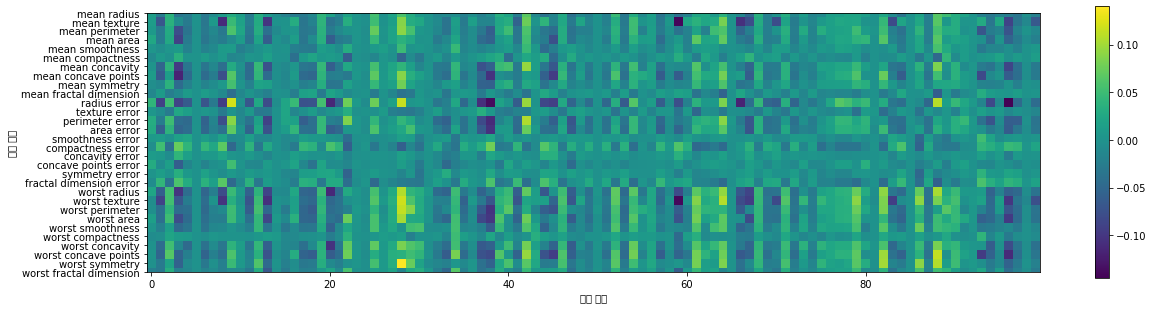

In [46]:
# 그래픽화 시켜보자
plt.figure(figsize = (20,5))
plt.imshow(mlp.coefs_[0], interpolation='none', cmap='viridis')
plt.yticks(range(30), cancer.feature_names)
plt.xlabel("은닉 유닛")
plt.ylabel("입력 특성")
plt.colorbar()

In [51]:
# 보내주신 wine data 로딩
import pandas as pd
wine = pd.read_csv("wine_data.csv")

In [52]:
wine = pd.read_csv('./wine_data.csv', names = ["Cultivator", "Alchol", "Malic_Acid", "Ash",
                                             "Alcalinity_of_Ash", "Magnesium", "Total_phenols",
                                             "Falvanoids", "Nonflavanoid_phenols",
                                             "Proanthocyanins", "Color_intensity", "Hue",
                                             "OD280", "Proline"], encoding="utf-8") 

In [56]:
wine.head(2)

,Cultivator,Alchol,Malic_Acid,Ash,Alcalinity_of_Ash,Magnesium,Total_phenols,Falvanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,OD280,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050


In [106]:
XX=wine.iloc[:,1:]

In [107]:
yy=wine['Cultivator']

In [108]:
X_train, X_test, y_train, y_test = train_test_split(XX,yy, stratify=y, random_state=42)

In [117]:
mean_on_train = X_train.mean(axis=0) 
std_on_train = X_train.std(axis=0)
X_train_scaled = (X_train - mean_on_train) /std_on_train
X_test_scaled = (X_test - mean_on_train) / std_on_train   

In [134]:
mean_on_train = X_train.mean(axis=0) ## 평균을 구함
std_on_train = X_train.std(axis=0)## 표준편차를 구함

X_train_scaled = (X_train - mean_on_train) /std_on_train  # 데이터에서 평균빼고 표준편차로 나눈것이 z 점수 표준화!
X_test_scaled = (X_test - mean_on_train) / std_on_train   

mlp = MLPClassifier(max_iter = 50,alpha=1, random_state=0) # 인스턴스하고
mlp.fit(X_train_scaled,y_train)# 피팅을 시켰더니
# 아래와같이 정확도가 나온다 
print('훈련세트 정확도: {:.3f}'.format(mlp.score(X_train_scaled, y_train)))#
print("테스트 세트 정확도: {:.3f}".format(mlp.score(X_test_scaled, y_test)))

훈련세트 정확도: 0.977
테스트 세트 정확도: 0.978


C:\Users\ICT01_09\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [ ]:
# 선생님답 

In [135]:
wine = pd.read_csv('./wine_data.csv', names = ["Cultivator", "Alchol", "Malic_Acid", "Ash",
                                             "Alcalinity_of_Ash", "Magnesium", "Total_phenols",
                                             "Falvanoids", "Nonflavanoid_phenols",
                                             "Proanthocyanins", "Color_intensity", "Hue",
                                             "OD280", "Proline"], encoding="utf-8") 
wine.shape  # 관측치 178, 변수14개  
#  -> 이게 독립변수와 종속변수를 분류시켜야한다 

(178, 14)

In [138]:
X=wine.drop('Cultivator',axis=1)  # cultivator 만 제외해서  x 로
y=wine['Cultivator']  # cultivator 만 y 로

In [139]:
from sklearn.model_selection import train_test_split
# train 과 test 를 분리해준다
X_train, X_test, y_train,y_test = train_test_split(X,y)  # 75대 25 로 분리해준다!

In [140]:
# 종류가 궁금하면 unique 를 쓴다
print(y.unique())  # 즉 y 는 3가지로 분리되어있다 

[1 2 3]


In [142]:
# 다음단계 : 전처리한다! (실제 이데이터는 훈련에 적합하게 만들어져있으니 다른 데이터의 경우 전처리 잘해주자)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()    # ===>     standardscaelr(copy=true, with_mean=true, with_std = true) 라는 의미가 있다 / copy=true : 원본을 그대로두라,  copy=false : 원본도 수정해라 

scaler.fit(X_train) # x_train 데이터를 피팅해준다!!

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [146]:
# 이제 신경망을 가동해본다!
from sklearn.neural_network import MLPClassifier
# hidden_layer_sizes 의 디폴트값은  (100,)임
mlp = MLPClassifier(hidden_layer_sizes=(30,30,30)) # 히든 사이즈를 주고 나머지는 디폴트값 그대로
mlp.fit(X_train,y_train)  # 모델이 이제 만들어졌으니 평가를 해본다

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(30, 30, 30), learning_rate='constant',
              learning_rate_init=0.001, max_iter=200, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=None, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

In [151]:
from sklearn.metrics import classification_report  # 이거 패키지 있으면 precision, recall, f1-score 전부 인쇄됨
# precision=정밀도=TP /(TP+FP) =예측을 중심으로 생각  
#recall : 재현율 = TP/(TP+TN) = 실제값을 중심으로 생각
#f1-score : 2*(precision*recall)  / (precision+recall)

from sklearn.metrics import confusion_matrix 
predictions = mlp.predict(X_test)

print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))
# 1,2,3 의 의미는 ?  unique한것 (와인품종을 의미)

# support : 맞은 개수 
# macro avg :  평균
# weighted avg :  

[[14  1  0]
 [ 0 15  0]
 [ 0  0 15]]
              precision    recall  f1-score   support

           1       1.00      0.93      0.97        15
           2       0.94      1.00      0.97        15
           3       1.00      1.00      1.00        15

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



In [ ]:
### 그냥 accuracy 만 보자

(13, 30)
(30, 30)
(30, 30)


Text(0, 0.5, '입력 특성')

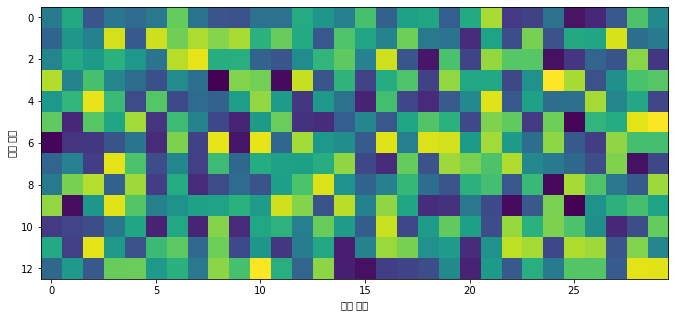

In [154]:
print(mlp.coefs_[0].shape)  # 13x30
print(mlp.coefs_[1].shape)  # 30x30
print(mlp.coefs_[2].shape)  # 30x30  나가는 놈 30으로 차수 결정된다
plt.figure(figsize=(20,5))
plt.imshow(mlp.coefs_[0], interpolation='none',cmap='viridis')
plt.xlabel("은닉 유닛")
plt.ylabel('입력 특성')
#plt.colorbar()

In [ ]:
#NMF ( Non-negative matrix factorization) : 비음수 행렬분해
#-> PCA 는 음수와 양수의 차이를 상계해서 처리한다 
#->NMF 는 양수인 데이터에 적용  (양수인데이터에는 음성데이터, signal 이 있다 ) 
# 

C:\Users\ICT01_09\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 49884 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\ICT01_09\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 44036 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\ICT01_09\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 49884 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\ICT01_09\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 44036 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\ICT01_09\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 49888 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\ICT01_09\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 54840 

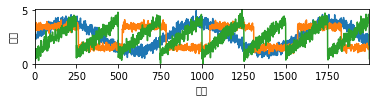

In [155]:
S=mglearn.datasets.make_signals()
plt.figure(figsize=(6,1))
plt.plot(S,'-')
plt.xlabel("시간")
plt.ylabel("신호")
plt.margins(0)

In [156]:
# 위의 그림과 같은 데이터가 들어온다 


복원한 신호 데이터 형태 : (178, 3)


In [160]:
#아래는  노이즈 : 전송데이터  (노이즈가 섞인 데이터를 보자, )   # 위에서는 원본데이터를 보았다 
import numpy as np
A = np.random.RandomState(0).uniform(size=(100,3))
X=np.dot(S,A.T)
print("측정데이터형태 : {}".format(X.shape))

측정데이터형태 : (2000, 100)


In [162]:
# NMF 로 처리한 데이터
from sklearn.decomposition import NMF, PCA
nmf = NMF(n_components=3, random_state=42)
S_ = nmf.fit_transform(X)  # 이렇게 하면 복원이 된다 
print("복원한 신호 데이터 형태 : {}".format(S_.shape))

복원한 신호 데이터 형태 : (2000, 3)


In [163]:
pca = PCA(n_components=3)  #pca 는 양수데이터의 노이즈를 제거하지 못한다
H=pca.fit_transform(X)

In [169]:
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(
    fname='c:/Windows/Fonts/malgun.ttf').get_name()
rc('font',family=font_name)  # 한글 안꺠지려면 이거 해주자

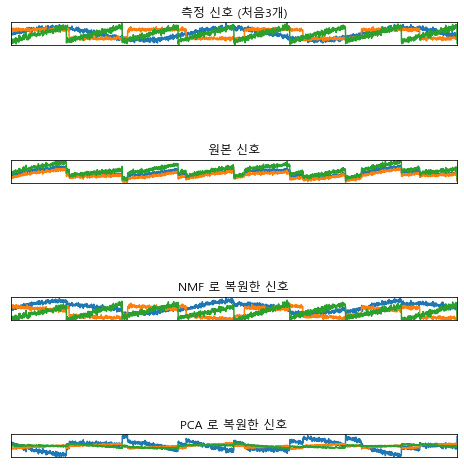

In [171]:
# 원본 =s,노이즈=x, NMF=s_, PCA=H   인데 NMF 로 복원한 이미지는 원본이랑 같다 ( pca로 복원한 이미지는 원본과 같지 않다 )
# 즉 PCA 는 양수데이터의 노이즈를 제거하지 못했다 그러므로 NMF 를 쓰는게 좋다 !!

models= [S,X,S_,H]
names=['측정 신호 (처음3개)', '원본 신호','NMF 로 복원한 신호', 'PCA 로 복원한 신호']
fig,axes = plt.subplots(4, figsize=(8,8), gridspec_kw={'hspace':5}, subplot_kw={'xticks':(), 'yticks':()})
for model, name, ax in zip(models, names,axes):
    ax.set_title(name)
    ax.plot(model[:,:3],'-')
    ax.margins(0)

In [ ]:
# 군집분석 시각화를 보자